<a href="https://colab.research.google.com/github/lucianojr15/gerenciadorTarefas/blob/master/C%C3%B3pia_de_C%C3%B3pia_de_Processamento_de_liga%C3%A7%C3%B5es_central_TRE_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importação de bibliotecas necessárias

In [ ]:
import csv
import pandas as pd
import numpy as np
from datetime import *
import math
from matplotlib import pyplot as plt

from sklearn import preprocessing


## Conectar com sistemas de arquivo do Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importação dos dados de arquivos CSV para o DataFrame

In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/dados_tre/DISQUE ELEITOR/CHAMADAS-RECEBIDAS-NOVEMBRO-2020.csv',header=0,sep=';')
data_frame

,Plataforma,Ramal,Número,Dt. Atendimento,Duração (seg)
0,10.8.20.69,9200,081982898567,2020-11-01 08:31:17,30
1,10.8.20.69,9400,81991361214,2020-11-15 06:34:48,120
2,10.8.20.69,9400,81999914850,2020-11-15 06:34:48,73
3,10.8.20.69,9149,81985481001,2020-11-15 06:33:57,111
4,10.8.20.69,9719,81989165270,2020-11-15 06:34:34,60
...,...,...,...,...,...
112716,10.8.20.69,9400,81992689953,2020-11-01 08:35:04,41
112717,10.8.20.69,9200,081982898567,2020-11-01 08:29:40,6
112718,10.8.20.69,9200,81991827453,2020-11-01 08:22:28,30
112719,10.8.20.69,9400,81986629396,2020-11-01 08:15:52,4


##Fuções para tratamento de dados do dataFrame

In [ ]:
def convertToTimestamp(row, inicio):
  if inicio:
    return datetime.strptime(row["Dt. Atendimento"], '%Y-%m-%d %H:%M:%S').timestamp()
  else:
    tempo_inicio = datetime.strptime(row["Dt. Atendimento"], '%Y-%m-%d %H:%M:%S')
    return (timedelta(seconds=row["Duração (seg)"]) + tempo_inicio).timestamp()

#Gerando timestamp
data_frame["tmp_inicio_ligacao"] = data_frame.apply (lambda row: convertToTimestamp(row, True), axis=1)
data_frame["tmp_fim_ligacao"] = data_frame.apply (lambda row: convertToTimestamp(row, False), axis=1)




In [ ]:
data_hora = pd.DataFrame(data_frame['Dt. Atendimento'].str.split(' ',1).tolist(),
                                 columns = ['Data','Hora'])


In [ ]:
data_frame

,Plataforma,Ramal,Número,Dt. Atendimento,Duração (seg),tmp_inicio_ligacao,tmp_fim_ligacao
0,10.8.20.69,9200,081982898567,2020-11-01 08:31:17,30,1.604219e+09,1.604220e+09
1,10.8.20.69,9400,81991361214,2020-11-15 06:34:48,120,1.605422e+09,1.605422e+09
2,10.8.20.69,9400,81999914850,2020-11-15 06:34:48,73,1.605422e+09,1.605422e+09
3,10.8.20.69,9149,81985481001,2020-11-15 06:33:57,111,1.605422e+09,1.605422e+09
4,10.8.20.69,9719,81989165270,2020-11-15 06:34:34,60,1.605422e+09,1.605422e+09
...,...,...,...,...,...,...,...
112716,10.8.20.69,9400,81992689953,2020-11-01 08:35:04,41,1.604220e+09,1.604220e+09
112717,10.8.20.69,9200,081982898567,2020-11-01 08:29:40,6,1.604219e+09,1.604219e+09
112718,10.8.20.69,9200,81991827453,2020-11-01 08:22:28,30,1.604219e+09,1.604219e+09
112719,10.8.20.69,9400,81986629396,2020-11-01 08:15:52,4,1.604219e+09,1.604219e+09


In [ ]:
data_frame.drop((['Conta', 'Nome Usuário']),axis=1, inplace=True)



KeyError: ignored

## Definição de período de análise

##Processamento de ligações simultâneos

In [ ]:
def getLigacaoSimultanea(row, momento):
  quantidade_ligacoes_simultaneas_momento = 0
  
  if ((datetime.fromtimestamp(row['tmp_inicio_ligacao']) <= momento) & (datetime.fromtimestamp(row['tmp_fim_ligacao']) >= momento)):
    quantidade_ligacoes_simultaneas_momento = quantidade_ligacoes_simultaneas_momento+1
    #print('ligações simultâneas no Horario{}'.format(momento))
    return True 
  
  return False

In [ ]:
def compara_data(row,data_comparada):
  data1 = row['tmp_inicio_ligacao']
  data2 = data_comparada
  data2 = date(data2.year,data2.month,data2.day)
  data1 = date.fromtimestamp(data1)
  
  if data1 == data2:
    return True


  return False

In [ ]:
resultado=0
lista_de_simultaneas_momento =[]
lista_de_horarios=[]
lista_de_resultados=[]
dia = datetime.fromisoformat('2020-11-01')
hora_inicial = dia + timedelta(hours = 8)
lista_de_dias =[hora_inicial + timedelta(days =i) for i in range(1,30,1) ]

for dia in lista_de_dias:
  lista_de_momentos = [dia + timedelta(seconds =i) for i in range(30,21600,30)]
  data_frame_1 = data_frame.where(data_frame.apply(lambda row:compara_data(row,dia),axis =1))
  data_frame_1.dropna(inplace=True)
  data_frame_1 = data_frame_1.where(data_frame_1['Duração (seg)']<8000).dropna()
  print(data_frame_1)
  for momento in lista_de_momentos:
    print(momento)
    simultanea = data_frame_1.apply (lambda row: getLigacaoSimultanea(row, momento),axis=1)
    for item in simultanea:
      if item == True:
        resultado =resultado +1
        #print("Ligações Simultâneas {} ".format(resultado))
    lista_de_horarios.append(momento)
    lista_de_resultados.append(resultado)
    resultado =0 


A saída de streaming foi truncada nas últimas 5000 linhas.
2020-11-24 08:59:00
2020-11-24 08:59:30
2020-11-24 09:00:00
2020-11-24 09:00:30
2020-11-24 09:01:00
2020-11-24 09:01:30
2020-11-24 09:02:00
2020-11-24 09:02:30
2020-11-24 09:03:00
2020-11-24 09:03:30
2020-11-24 09:04:00
2020-11-24 09:04:30
2020-11-24 09:05:00
2020-11-24 09:05:30
2020-11-24 09:06:00
2020-11-24 09:06:30
2020-11-24 09:07:00
2020-11-24 09:07:30
2020-11-24 09:08:00
2020-11-24 09:08:30
2020-11-24 09:09:00
2020-11-24 09:09:30
2020-11-24 09:10:00
2020-11-24 09:10:30
2020-11-24 09:11:00
2020-11-24 09:11:30
2020-11-24 09:12:00
2020-11-24 09:12:30
2020-11-24 09:13:00
2020-11-24 09:13:30
2020-11-24 09:14:00
2020-11-24 09:14:30
2020-11-24 09:15:00
2020-11-24 09:15:30
2020-11-24 09:16:00
2020-11-24 09:16:30
2020-11-24 09:17:00
2020-11-24 09:17:30
2020-11-24 09:18:00
2020-11-24 09:18:30
2020-11-24 09:19:00
2020-11-24 09:19:30
2020-11-24 09:20:00
2020-11-24 09:20:30
2020-11-24 09:21:00
2020-11-24 09:21:30
2020-11-24 09:22:00
2

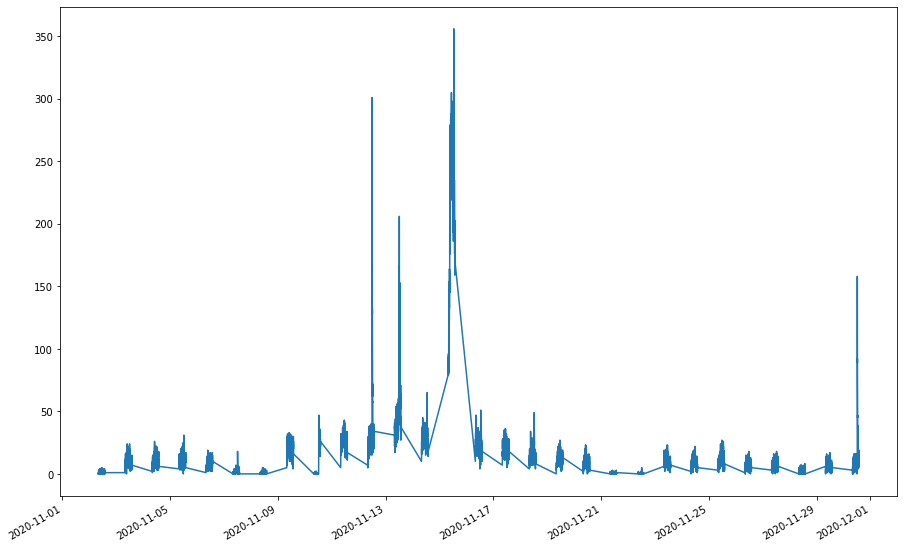

In [ ]:
series_ligacoes_simultaneas = pd.Series(data=lista_de_resultados, index=(lista_de_horarios))
series_ligacoes_simultaneas.plot(figsize=(15,10))


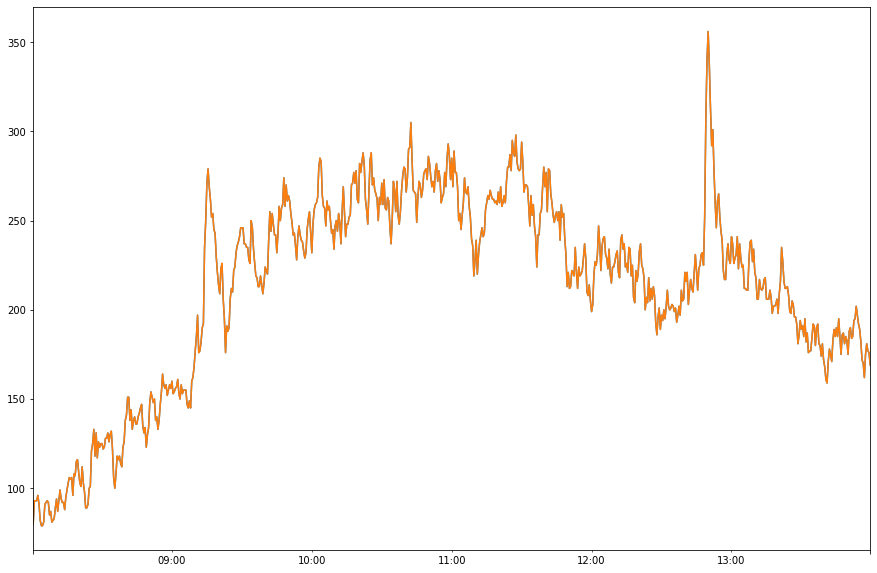

In [ ]:
series_ligacoes_filtrada = series_ligacoes_simultaneas.loc['2020-11-15'].plot()
primeira_semana = series_ligacoes_simultaneas.loc['2020-11-15']
primeira_semana.plot(figsize=(15,10))

### Armazenamento do resultado em arquivos CSV

In [ ]:
arquivo = hora_inicial.strftime('%Y-%m-%d')
series_ligacoes_simultaneas.to_csv('/content/'+arquivo +'.csv')
primeira_semana.to_csv('/content/06_04_2021.csv')

##Rastrear Ligações por duração

In [ ]:
data_frame_1_dia.where(data_frame_1_dia['Duração (seg)']>8000).dropna()

,Plataforma,Ramal,Número,Operadora,Tipo Chamada,Dt. Atendimento,Duração (seg),tmp_inicio_ligacao,tmp_fim_ligacao
2825,10.8.20.69,9400.0,999002046,TIM,Celular,2021-05-21 12:47:40,86389.0,1.621601e+09,1.621688e+09
4305,10.8.20.69,9400.0,999009797,Embratel,Celular,2021-05-21 10:26:45,86402.0,1.621593e+09,1.621679e+09
4314,10.8.20.69,9400.0,999009371,Embratel,Celular,2021-05-21 11:05:39,86408.0,1.621595e+09,1.621682e+09
4346,10.8.20.69,9400.0,999002020,TIM,Celular,2021-05-21 12:52:32,86397.0,1.621602e+09,1.621688e+09
5900,10.8.20.69,9400.0,999002020,TIM,Celular,2021-05-21 12:47:14,86395.0,1.621601e+09,1.621688e+09


In [ ]:
momento = timedelta(days=1)

In [ ]:
momento.total_seconds()


86400.0

In [ ]:
hoje =datetime.today()

final_do_dia = hoje + timedelta(hours=1)

final_do_dia.ctime()

'Fri May  7 16:38:33 2021'

In [ ]:
print("lista de dicionarios com resultados:{}".format(len(lista_de_simultaneas_momento)))
print("lista com quantidade de simultaneas:{}".format(len(lista_de_resultados)))
print("lista com horarios:{}".format(len(lista_de_horarios)))
#lista_de_simultaneas_momento

lista de dicionarios com resultados:0
lista com quantidade de simultaneas:2879
lista com horarios:2879


In [ ]:
day= timedelta(days =1 )

In [ ]:
day.total_seconds()

86400.0

In [ ]:
day.total_seconds()/30

2880.0

In [ ]:
resultado = data_frame_1_dia.apply (lambda row: getLigacaoSimultanea(row, momento),axis=1)
resultado

1035    False
1036    False
1038    False
1076    False
1094    False
        ...  
5403    False
5406    False
5427    False
5430    False
5439    False
Length: 387, dtype: bool

In [ ]:
momento

datetime.datetime(2021, 4, 14, 0, 0, 30)

In [ ]:
resultado=0
for momento in lista_de_momentos:
  simultanea = data_frame_1_dia.apply (lambda row: getLigacaoSimultanea(row, momento),axis=1)
  for item in simumtanea:
    
    resultado =resultado +1
    print("Ligações Simultâneas {} ".format(resultado))
  resultado =0 